<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000     

C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


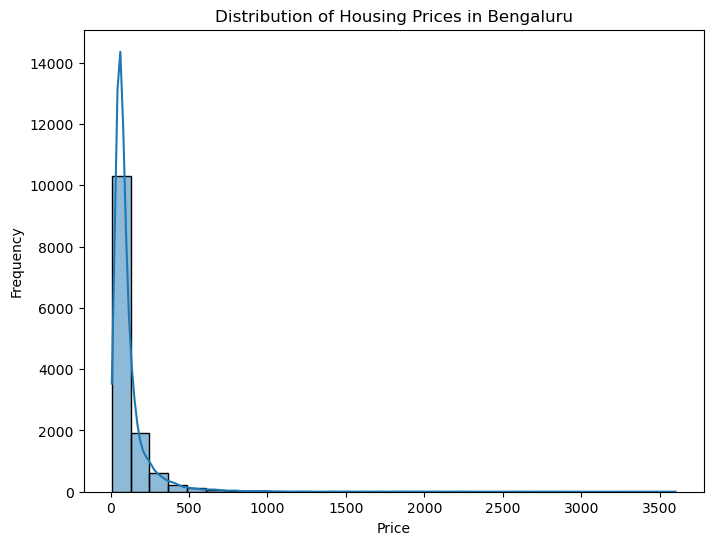

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


C:\Users\prach\AppData\Local\Temp\ipykernel_9884\2390824802.py:50: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('Bengaluru_House_Data.csv')

# Exploratory Data Analysis (EDA)
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Visualize the distribution of the target variable (e.g., price)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices in Bengaluru')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Check for missing values
print(df.isnull().sum())

# Feature Engineering
# Check if the column exists before dropping it
column_to_drop = 'some_column_to_drop'
if column_to_drop in df.columns:
    df = df.drop([column_to_drop], axis=1)

# Handle missing values in numerical features (replace with median for simplicity)
numerical_features = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Handle categorical features (convert to dummy variables)
categorical_columns = ['categorical_feature_1', 'categorical_feature_2']
for col in categorical_columns:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Set option to handle inf values
pd.set_option('mode.use_inf_as_na', True)
